### T-distributed Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is very high. This will suppress some
noise and speed up the computation of pairwise distances between
samples. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Customer Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [3]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [4]:
X = data.drop("Churn",axis=1)
y = data["Churn"]

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
final_df = pd.DataFrame(data=X_scaled, columns=sc.get_feature_names_out())

In [6]:
## PCA with 2 components and visualise
pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [7]:
pca.score(X_scaled)
#Average log-likelihood of the samples under the current model.

-18.55742980953196

In [8]:
final_df["PCA1"] = X_pca[:,0]
final_df["PCA2"] = X_pca[:,1]
final_df["y"] = y

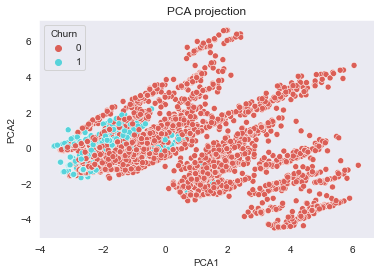

In [9]:
sns.set_style(style='dark')
sns.scatterplot(x="PCA1",y="PCA2",data=final_df,hue=y,palette=sns.color_palette("hls", 2)).set(title="PCA projection")
plt.show()

In [10]:
## TSNE with 2 components and visualise
tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
final_df["TSNE1"] = X_tsne[:,0]
final_df["TSNE2"] = X_tsne[:,1]

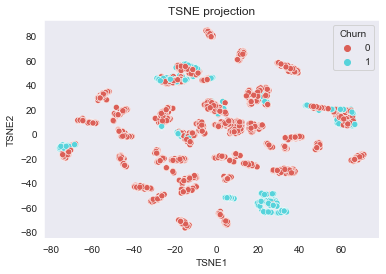

In [12]:
sns.set_style(style='dark')
sns.scatterplot(x="TSNE1",y="TSNE2",data=final_df,hue=y,palette=sns.color_palette("hls", 2)).set(title="TSNE projection")
plt.show()

In [13]:
tsne.kl_divergence_

0.30329248309135437

In [14]:
perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    tsne = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = tsne.fit_transform(X_scaled)
    divergence.append(tsne.kl_divergence_)

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 2

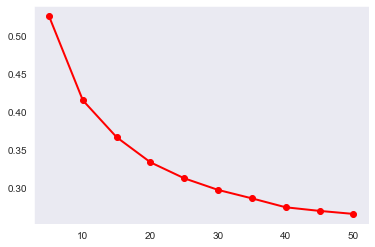

In [15]:
plt.plot(perplexity,divergence,'ro-',linewidth=2)
plt.show()

perplexity : float, default=30.0
The perplexity is related to the number of nearest neighbors that
is used in other manifold learning algorithms. Larger datasets
usually require a larger perplexity. Consider selecting a value
between 5 and 50. Different values can result in significantly
different results. The perplexity must be less that the number
of samples.

In [16]:
tsne = TSNE(n_components=2, init="pca", perplexity=50)
reduced = tsne.fit_transform(X_scaled)

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\nswet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [17]:
final_df["TSNE1_new"] = reduced[:,0]
final_df["TSNE2_new"] = reduced[:,1]

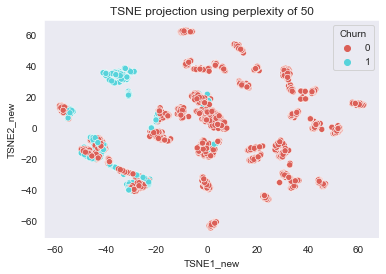

In [18]:
sns.set_style(style='dark')
sns.scatterplot(x="TSNE1_new",y="TSNE2_new",data=final_df,hue=y,palette=sns.color_palette("hls", 2)).set(title="TSNE projection using perplexity of 50")
plt.show()

In [19]:
### TSNE KL Divergence
tsne.kl_divergence_

0.2623290419578552